In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pickle

In [263]:
# Fake data
#n_cal = 1000
#n_classes = 100
#n_test = 500
#pred_cal = softmax(np.random.rand(n_cal,n_classes), axis = 1)
#pred_test = softmax(np.random.rand(n_test,n_classes), axis = 1)
#true_cal = np.eye(n_classes)[np.random.choice(n_classes, n_cal)]
#true_test = np.eye(n_classes)[np.random.choice(n_classes, n_test)]

In [274]:
with open('../../predictions/MNIST_softmax_cal_proba.pickle', 'rb') as f:
    pred_cal = pickle.load(f)
with open('../../predictions/MNIST_softmax_test_proba.pickle', 'rb') as f:
    pred_test = pickle.load(f)
with open('../../predictions/MNIST_softmax_cal_true.pickle', 'rb') as f:
    true_cal = pickle.load(f)
with open('../../predictions/MNIST_softmax_test_true.pickle', 'rb') as f:
    true_test = pickle.load(f)
n_cal, n_classes = pred_cal.shape 
n_test = true_test.shape[0]
print(f'{n_cal} calibration points')
print(f'{n_test} test points')
print(f'{n_classes} classes')

1000 calibration points
10000 test points
10 classes


In [275]:
# Get non-conformity scores
alpha = 0.1

true_mask = true_cal.astype(bool)
cal_scores = 1 - pred_cal[true_mask]
q_level = np.ceil((n_cal+1)*(1-alpha))/n_cal
qhat = np.quantile(cal_scores, q_level, method = 'higher') # check quantile method

def get_pvalue(preds):
    return np.array([((cal_scores>= el).sum() + 1)/(len(cal_scores) + 1) for el in preds])
p_values_cal = get_pvalue(cal_scores)

In [276]:
# test predictions

test_scores = 1 - pred_test
test_match = test_scores<= qhat
test_pvalues = np.apply_along_axis(get_pvalue,1,test_scores)

set_size = test_match.sum(axis = 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x16d14fa50>,
 'caps': [<matplotlib.lines.Line2D at 0x16d164ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d14f150>],
 'medians': [<matplotlib.lines.Line2D at 0x16d1664d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d166e50>],
 'means': []}

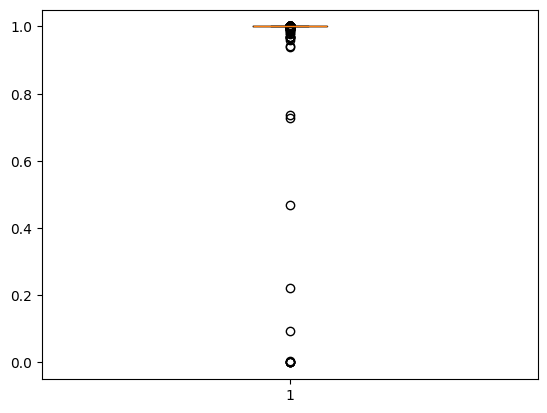

In [277]:
plt.boxplot(pred_cal[true_mask])

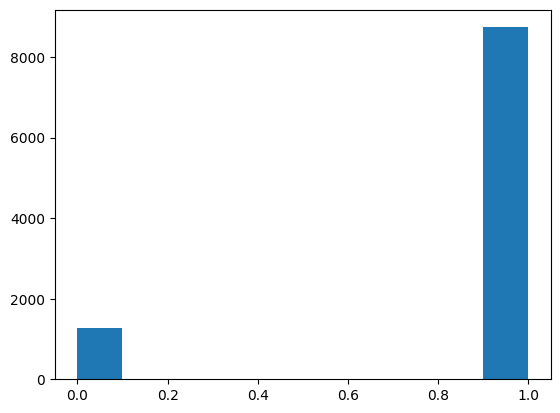

In [278]:
plt.hist(set_size);

In [279]:
coverage = test_match[true_test.astype(bool)].sum()/n_test

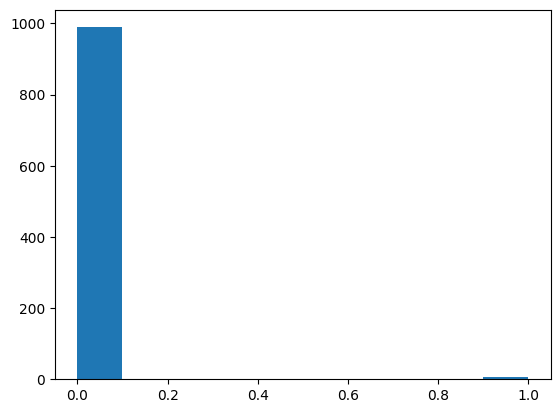

In [285]:
plt.hist(cal_scores);

In [286]:
coverage

0.8737

In [287]:
q_level

0.901

In [288]:
qhat

3.4570694e-05